# TOP 3 REVENUE GENERATING CUSTOMER COLLECTION ANALYSIS


<span style="color: gray; font-size:1em;">January-2020</span>


## Table of Contents
* [Objective](#objective)

* [Section One - Import Data into IDE](#import_data)
    * [Part I - Gathering Data](#gather_data)
    * [Part II - Assessing Data](#assess_data)
    * [Part III - Cleaning Data](#clean_data)
    
* [Section Two - Dataset of Interest](#dataset)

    * [Variable 1 - display name](#display_name)

    * [Variable 2 - type of material](#material)
     * [Vintage Analysis](#vintage)
     * [Original Analysis](#original)
     * [Matte Analysis](#matte)
     * [combined collection dataset](#collectionsdf)
     
    * [Variable 3 - shipping country](#shipping_country)
     * [Germany collections dataframe](#germany)
     * [Germany Vintage Analysis](#germanyvintage)
     * [Germany Original Analysis](#germanyoriginal)
     * [Germany Matte Analysis](#germanymatte)
     
    * [Variable 4 - Customer Name](#customer_name)
     * [Top three customers in Germany](#top3)
     * [Top revenue generating customer in Germany ](#topcustomer)
     * [Second Top revenue generating customer in Germany ](#secondtopcustomer)
     * [Third Top revenue generating customer in Germany ](#thirdtopcustomer)
   
    
  
    


<a id='objective'></a>
## Objective

SECRID is a business entity based in the Netherlands. It produces, stocks and sells designer wallets, particularly leather based wallets in more than 100 countries all over the world.

The objective of this notebook is to inspect the trend of sales data for the 2015 to 2019 calendar years and compare Vintage, Original and Matte product collections of the top three (3) revenue generating customers in Germany.



<a id='#import_data'></a>
## Section One : Import Data into IDE

<a id='gather_data'></a>
## Part I : Gathering Data

In [1]:
# load required libraries
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import read_excel

import zipfile
import xlsxwriter

import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.style.use('seaborn')

import six
import calendar
from datetime import datetime, timedelta

# environment settings:
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_seq_items',None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)


### Load .xlxs files

In [2]:
#load sales 2015 
df1 = pd.read_excel('SECRID_DATA.xlsx',0) #load first spreadsheet of SECRID DATA.xlxs 

**Test** 

In [ ]:
df1.head()# preview the first 5 rows

In [3]:
#load sales 2016 
df2 = pd.read_excel('SECRID_DATA.xlsx',1) #load second spreadsheet of SECRID DATA.xlxs

**Test** 

In [ ]:
df2.head()# preview the first 5 rows

In [4]:
#load sales 2017
df3 = pd.read_excel('SECRID_DATA.xlsx',2)  #load third spreadsheet ofSECRID DATA.xlxs

**Test** 

In [ ]:
df3.head()# preview the first 5 rows

In [5]:
#load sales 2018
df4 = pd.read_excel('SECRID_DATA.xlsx',3)  #load fourth spreadsheet of SECRID DATA.xlxs

**Test** 

In [ ]:
df4.head()# preview the first 5 rows

In [6]:
#load sales 2019
df5 = pd.read_excel('SECRID_DATA.xlsx',4)  #load fifth spreadsheet of SECRID DATA.xlxs

**Test** 

In [ ]:
df5.head()# preview the first 5 rows

In [7]:
#combine df1 - df5  into one complete dataframe 'df'
df = pd.concat([df1, df2, df3, df4, df5]) 

<a id='assess_data'></a>
## Part II - Assessing  Data

In [ ]:
df.head() #preview first five rows

In [ ]:
df.tail() #preview last five rows

In [8]:
# Check size of the dataframe 
df.shape 

(2021470, 24)

In [ ]:
# list names of columns in dataframe
df.columns 

In [ ]:
# View info of the dataframe 
df.info()

In [ ]:
# view some of the core statistics about columns
df.describe(include='all')

In [ ]:
# check the Data types (dtypes) of each column in Dataframe
df.dtypes 

In [ ]:
# Total sum of duplicate rows
df.duplicated().sum() # returns a Boolean Series with True value for each duplicated row and sums them

In [ ]:
#return the number of unique elements in each column
print(df.nunique()) 

In [ ]:
df.count() #returns the number of non-missing values for each column or row

In [ ]:
#Total missing values(NaN) in a DataFrame
df.isnull().sum().sum()

In [ ]:
#Count number of NaN for each column in DataFrame
print(df.isnull().sum()) 

<a id='issues'></a>
**Quality issues**
 * Rename column names to have clear, descriptive names in small letters according to best practice. Column 'name' can be renamed to 'customer_name' and column 'material' can be renamed to 'type_of_material'
 * Set to columns to appropriate category data type: 'internal_id', 'document_number', 'customer_name', 'customer _category', 'retailer_role', 'shipping_country', 'item', 'display_name', 'pim_category','type_of_material', 
   'pim_colour', 'wsl', 'while_stock_lasts' and 'cardprotector_colour' 

<a id='clean_data'></a>
## Part III - Cleaning Data

In [9]:
# Create copy of original DataFrame
df_copy = df.copy()

In [10]:
#Fixing messy column names
df_copy.columns = df_copy.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

**Test**

In [ ]:
# list names of columns in dataframe
df_copy.columns 

In [11]:
# change column names using rename function
df_copy.rename(columns={                                                 
                         'name':'customer_name',                        
                         'wsl_+':'wsl',
                         'material':'type_of_material' }, 
                 inplace=True)

**Test**

In [ ]:
df_copy.columns #List of column names in df_clean Dataframe

**Define**
<br>Set appropriate data types for fields mentioned in the [Quality issues](#issues) 

In [12]:
# use .astype to change data type of dataframe columns
df_copy = df_copy.astype({"internal_id":'category',"document_number":'category',"shipping_address_1":'category',"shipping_address_2":'category',"shipping_city":'category',"shipping_zip":'category',"shipping_state/province":'category', "customer_name":'category', "customer_category":'category', "retailer_role":'category', "shipping_country":'category', "item":'category',"display_name":'category', "pim_category":'category', "type_of_material":'category', "pim_colour":'category',"wsl":'category', "while_stock_lasts":'category', "cardprotector_colour":'category'})

**Test**

In [ ]:
df_copy.info()

In [ ]:
# view some of the core statistics about columns
df_copy.describe(include='all')

### content structure of sales dataset
The sales data contains 24 columns (variables) and 2,021,470 rows (entries). 
This is evidence that 2,021,470 sale transactions were completed in the January 2015 – July 2019 period for SECRID business. The dataset contained features about:

* Products for sale: item, display_name, pim_category, pim_colour, type_of_material and cardprotector_colour
* The country the item was shipped to : shipping_country  
* Customer data:  customer_name, customer_category and retailer_role
* Sale transactions: internal_id, document_number, quantity, amount, amount(foreign_currency) and date


### Detected Missing Values
A null value is a value in a field that appears to be blank. A null value is a field with no value. 
The table below indicates the number and  the resulting percentage of missing values per column.This able is manually created with results from running; **df.count()** to get Value Count of non-missing values in a column and 
**print(df.isnull().sum())** which will give the count number of NaN for each column in DataFrame.

| Variable Name  | Value Count| Number Of Missing Values| % Of Missing Values
| -------------  | ------------- |------------- |-------------
| internal_id    | 2,021,470  |0 |0%
| document_number| 2,021,470  |0 |0%
| date           | 2,021,470  |0 |0%
| date_created   | 2,021,470  |0 |0%
| customer_name  | 2,021,470  |0 |0%
| customer_category  | 2,015,375  |6,095     |0.30%
| retailer_role      | 201,788    |1,819,682 |90.02%
| shipping_address_1 | 2,011,883  |9,587     |0.47%
| shipping_address_2 | 367,598    |1,653,872 |81.82%
| shipping_city      | 2,012,657  |8,813 |0.44%
| shipping_zip       | 1,990,236  |31,234|1.55%
| shipping_state/province |395,792 |1,625,678 |80.42%
| shipping_country   |2,014,891   |6,579 |0.33%
| item               | 2,021,470  |0 |0%
| display_name       | 2,021,470  |0 |0%
| quantity           | 2,021,470  |0 |0%
| amount             | 2,021,470  |0 |0%
| amount_foreign_currency | 2,021,470 |0 |0%
| type_of_material        | 1,941,770 |79,700 |3.94%
| pim_category            | 1,944,252 |77,218 |3.82%
| pim_colour              | 1,933,547 |87,923|4.35%
| wsl_+                   | 2,021,470 |0     |0%
| while_stock_lasts       | 2,021,470 |0     |0%
| cardprotector_colour    | 1,877,516 |143,954 |7.12%




<a id='dataset'></a>
## DATASET OF INTEREST

In order to meet the objective, we shall extract the transactions of interest. These are transactions where the quantity is positive (>0) and the amount is positive (>0). This implies that item(s) were sold and revenue was generated for the business.  

We shall further filter and create datasets where Vintage, Original and Matte items were sold. This dataset will be  filtered further to only transaction where items were shipped to Germany.


In [13]:
# rows with positive values in Quantity column and Amount column
# df_clean consits of transactions that bring in revenue
df_clean = df_copy[(df_copy.amount>0) & (df_copy.quantity>0)]

In [15]:
#create new column 'year' that registered year sale transaction was held(helps with analysis)
df_clean['year'] = df_clean.date.dt.year

C:\Users\waith\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


**Test**

In [16]:
df_clean.head() #preview five first rows

,internal_id,document_number,date,date_created,customer_name,customer_category,retailer_role,shipping_address_1,shipping_address_2,shipping_city,shipping_zip,shipping_state/province,shipping_country,item,display_name,quantity,amount,amount_foreign_currency,pim_category,type_of_material,pim_colour,wsl,while_stock_lasts,cardprotector_colour,year
0,24560,I-1510000,2015-01-05,2015-01-05 12:35:00,C-9855 SkilledIn,Promotional sales - End user,NaN,"Scheepsbouwweg 8, K11",NaN,Rotterdam,3089 JW,NaN,Netherlands,TA-Brown,Twinwallet Amazon Brown,1,54.26,54.26,Twinwallet,Amazon,Brown,No,No,Silver,2015
1,24580,I-1510001,2015-01-05,2015-01-05 16:15:00,C-9255 Rubino di Fabio Della Rocca attn. Spimar,Leather goods,NaN,Via Della Croce 75 A,NaN,Roma,00187,NaN,Italy,C-Black,Cardprotector Black,1,11.20,11.20,Cardprotector,Aluminium,Black,No,No,Black,2015
2,24580,I-1510001,2015-01-05,2015-01-05 16:15:00,C-9255 Rubino di Fabio Della Rocca attn. Spimar,Leather goods,NaN,Via Della Croce 75 A,NaN,Roma,00187,NaN,Italy,C-Blue,Cardprotector Blue,2,22.40,22.40,Cardprotector,Aluminium,Blue,No,No,Blue,2015
3,24580,I-1510001,2015-01-05,2015-01-05 16:15:00,C-9255 Rubino di Fabio Della Rocca attn. Spimar,Leather goods,NaN,Via Della Croce 75 A,NaN,Roma,00187,NaN,Italy,C-Champagne,Cardprotector Champagne,1,11.20,11.20,NaN,NaN,NaN,No,No,NaN,2015
4,24580,I-1510001,2015-01-05,2015-01-05 16:15:00,C-9255 Rubino di Fabio Della Rocca attn. Spimar,Leather goods,NaN,Via Della Croce 75 A,NaN,Roma,00187,NaN,Italy,C-Red,Cardprotector Red,2,22.40,22.40,Cardprotector,Aluminium,Red,No,No,Red,2015


<a id='display_name'></a>
## VARIABLE : display_name

We shall asses this variable because it gives a detailed chracteristic of item such as the 'pim_category', 'type_of_material' and 'colour'.


In [ ]:
df_clean.display_name.describe() #overview of variable; count, unique, top,freq

In [ ]:
#list all display_name categories
print(df_clean.display_name.cat.categories) # Get list of categories in categorical variable

In [ ]:
df_clean.display_name.value_counts() #count per category

In [ ]:
#number of missing values in display_name column
print(df_clean.display_name.isnull().sum()) 

<a id='material'></a>
## VARIABLE : type_of_material

This variable is of interest as it is where we shall access the type of material e.g vintage, original or matte



In [ ]:
df_clean.type_of_material.describe() #overview of variable; count, unique, top,freq

In [ ]:
#Types of material used in production
print (df_clean.type_of_material.cat.categories) # Get list of categories in categorical variable

In [ ]:
df_clean.type_of_material.value_counts() #count per sale transactions

In [ ]:
# the number of missing values in type of material column
print(df_clean.type_of_material.isnull().sum()) 

### Findings
This column indicates the type of material used in creating the product.
The business uses 29 unique types of material. This column has 75,661 missing values after filtering 'positive' sale transactions.**Vintage** category has the highest frequency of 'positive'/revenue generating sale transactions at 549,615.

 <a id='vintage'></a>
### VINTAGE PRODUCT ANALYSIS

vintage consits of the follwing display items;
      
       'Miniwallet Vintage Black', 'Miniwallet Vintage Blue',
       'Miniwallet Vintage Brown', 'Miniwallet Vintage Chocolate',
       'Miniwallet Vintage Cognac', 'Miniwallet Vintage Cognac-Rust',
       'Miniwallet Vintage Concrete', 'Miniwallet Vintage Grey',
       'Miniwallet Vintage Grey-Black', 'Miniwallet Vintage Ochre',
       'Miniwallet Vintage Olive-Black', 'Miniwallet Vintage Rose'
       
       'Slimwallet Vintage Black', 'Slimwallet Vintage Blue',
       'Slimwallet Vintage Blue Silver', 'Slimwallet Vintage Brown',
       'Slimwallet Vintage Chocolate', 'Slimwallet Vintage Cognac',
       'Slimwallet Vintage Cognac-Rust', 'Slimwallet Vintage Grey-Black',
       'Slimwallet Vintage Ochre', 'Slimwallet Vintage Olive-Black'
       
       'Twinwallet Vintage Black', 'Twinwallet Vintage Blue',
       'Twinwallet Vintage Brown', 'Twinwallet Vintage Chocolate',
       'Twinwallet Vintage Cognac', 'Twinwallet Vintage Ochre'
       
       'PromoSales Miniwallet Vintage Cognac-Rust'


In [17]:
# filter to only type of material of interest ('Vintage')
# after manually assesing the dataframe incompletevintagedf, we find it is missing 'Slimwallet Vintage Blue Silver' and 'Twinwallet Vintage Blue
incompletevintagedf =df_clean[(df_clean.type_of_material == 'Vintage')]

In [18]:
# we create a dataframe with the missing display items
# these missing items were in the rows with missing values in 'type_of_material' column
missing_vintage = df_clean[(df_clean.display_name == 'Slimwallet Vintage Blue Silver') | (df_clean.display_name == 'Twinwallet Vintage Blue')]

**Test**

In [ ]:
missing_vintage.head() # preview first 5 rows

In [19]:
#combine incompletevintagedf and missingvintage into one complete dataframe 'vintagedf'
vintagedf = pd.concat([missing_vintage, incompletevintagedf]) 

In [20]:
#this new column will help us uniquely identify vintage dataframe of data once it is combined with the original and matte dataframes
#insert new column with value 'vint'
vintagedf['collection']='vint'

**Test**

In [ ]:
vintagedf.head() #preview first 5 rows

In [ ]:
#Total quantity of items sold and corresponding revenue generated per 'vintage' item.
vintage_items= vintagedf.groupby(
   ['display_name']
).agg(
    {
         'amount':sum,    # Sum revenue per customer
         'quantity': sum  # get the sum of items sold per year
         
    }
)

vintage_items.sort_values(by=['amount'], inplace=True, ascending=False) 

In [ ]:
# we discover this dataset includes display items that are NOT vintage
vintage_items #includes 'Perforated' and 'Veg' items

In [21]:
# delete all rows with display_name ' Perforated' and 'Veg'
vintagedf = vintagedf[~vintagedf.display_name.str.contains('Perforated')]
vintagedf = vintagedf[~vintagedf.display_name.str.contains('Veg')]

**Test**

In [ ]:
#Total quantity of items sold and corresponding revenue generated per 'vintage' item.
vintage_items= vintagedf.groupby(
   ['display_name']
).agg(
    {
         'amount':sum,    # Sum revenue per customer
         'quantity': sum  # get the sum of items sold per year
         
    }
)

vintage_items.sort_values(by=['amount'], inplace=True, ascending=False) 

In [ ]:
# we observe that the non-vintage items have been removed
vintage_items

In [22]:
# Group the data frame by year and extract a number of stats per year
vintage_revenuerank = vintagedf.groupby(
   ['year']
).agg(
    {
         'amount':sum,    # Sum revenue per customer
         'quantity': sum  # get the sum of items sold per year
         
    }
)

vintage_revenuerank.sort_values(by=['year'], inplace=True, ascending=True)

In [23]:
vintage_revenuerank

,amount,quantity
year,,
2015,6582818.52,283750
2016,9062221.16,378753
2017,10900189.84,454255
2018,11995679.28,498590
2019,11724125.47,477974


#### Vintage Pivot Table

In [ ]:
#  PIVOT TABLE
vintage_table = pd.pivot_table(vintagedf, index="display_name",columns='year',
                              values =["amount","quantity"],aggfunc=sum, margins=True)

#sort the pivot table
vintage_table.sort_values(by=('amount','All'), ascending=False, inplace= True)

In [ ]:
vintage_table

In [ ]:
#fix column names
vintage_table.columns =[s1 + '_' + str(s2) for (s1,s2) in vintage_table.columns.tolist()]

In [ ]:
#proposed column order
columnsTitles = ['quantity_2015','amount_2015','quantity_2016','amount_2016','quantity_2017','amount_2017','quantity_2018','amount_2018','quantity_2019','amount_2019','quantity_All','amount_All']

In [ ]:
#re-arrange column indexes(order) based on above columnsTitles
vintage_table = vintage_table.reindex(columns=columnsTitles)

In [ ]:
#drop first row
vintage_table = vintage_table.drop(vintage_table.index[0])

In [ ]:
vintage_table

### Vintage dataframe second approach
This is asecond approach to creating the vintage dataframe by using the dispaly_names.We observe that the both approaches result to the same dataframe.Any approach can therefore be used. 

In [ ]:
#miniwallet vintage dataframe
miniwalletvintage = df_clean[(df_clean.display_name == 'Miniwallet Vintage Black') 
                             | (df_clean.display_name == 'Miniwallet Vintage Blue') 
                             | (df_clean.display_name == 'Miniwallet Vintage Brown')
                             | (df_clean.display_name ==  'Miniwallet Vintage Chocolate')
                             | (df_clean.display_name == 'Miniwallet Vintage Cognac')
                             | (df_clean.display_name == 'Miniwallet Vintage Cognac-Rust')
                             | (df_clean.display_name == 'Miniwallet Vintage Concrete')
                             | (df_clean.display_name == 'Miniwallet Vintage Grey')
                             | (df_clean.display_name == 'Miniwallet Vintage Grey-Black')
                             | (df_clean.display_name == 'Miniwallet Vintage Ochre')
                             | (df_clean.display_name == 'Miniwallet Vintage Olive-Black')
                             | (df_clean.display_name == 'Miniwallet Vintage Rose')
                             | (df_clean.display_name == 'PromoSales Miniwallet Vintage Cognac-Rust')]
                                                      

In [ ]:
miniwalletvintage.head()#preview the first five rows

In [ ]:
#slimwallet vintage dataframe
slimwalletvintage = df_clean[(df_clean.display_name == 'Slimwallet Vintage Black') 
                             | (df_clean.display_name == 'Slimwallet Vintage Blue') 
                             | (df_clean.display_name == 'Slimwallet Vintage Blue Silver')
                             | (df_clean.display_name ==  'Slimwallet Vintage Chocolate')
                             | (df_clean.display_name == 'Slimwallet Vintage Cognac')
                             | (df_clean.display_name == 'Slimwallet Vintage Cognac-Rust')                            
                             | (df_clean.display_name == 'Slimwallet Vintage Grey-Black')
                             | (df_clean.display_name == 'Slimwallet Vintage Ochre')
                             | (df_clean.display_name == 'Slimwallet Vintage Olive-Black')
                             | (df_clean.display_name == 'Slimwallet Vintage Brown')]


In [ ]:
slimwalletvintage.head()#preview the first 5 rows

In [ ]:
#Twinwallet vintage dataframe
twinwalletvintage = df_clean[(df_clean.display_name == 'Twinwallet Vintage Black') 
                             | (df_clean.display_name == 'Twinwallet Vintage Blue') 
                             | (df_clean.display_name == 'Twinwallet Vintage Brown')
                             | (df_clean.display_name ==  'Twinwallet Vintage Chocolate')
                             | (df_clean.display_name == 'Twinwallet Vintage Cognac')
                             | (df_clean.display_name == 'Twinwallet Vintage Ochre')]

In [ ]:
twinwalletvintage.head() 

In [ ]:
#combine the miniwallet,twinwallet and slimwallet vintage dataframe
vintagedf2 = pd.concat([miniwalletvintage, slimwalletvintage, twinwalletvintage])

In [ ]:
#this new column will help us uniquely identify vintage dataframe of data once it is combined with the original and matte dataframes
#insert new column with value 'vint'
vintagedf2['collection']='vint'

**Test**

In [ ]:
vintagedf2.head()

In [ ]:
# Group the data frame by year and extract a number of stats per year
vintage_rank = vintagedf2.groupby(
   ['year']
).agg(
    {
         'amount':sum,    # Sum revenue per customer
         'quantity': sum  # get the sum of items sold per year
         
    }
)

vintage_rank.sort_values(by=['year'], inplace=True, ascending=True)

In [ ]:
#lists the total revenue amount and total items sold per year for vintage collection items.
vintage_rank

#### Vintagedf2 Pivot Table

In [ ]:
#  PIVOT TABLE
vintagedf2_table = pd.pivot_table(vintagedf2, index="display_name",columns='year',
                              values =["amount","quantity"],aggfunc=sum, margins=True)

#sort the pivot table
vintagedf2_table.sort_values(by=('amount','All'), ascending=False, inplace= True)

In [ ]:
vintagedf2_table

In [ ]:
#fix column names
vintagedf2_table.columns =[s1 + '_' + str(s2) for (s1,s2) in vintagedf2_table.columns.tolist()]

In [ ]:
#proposed column order
columnsTitles = ['quantity_2015','amount_2015','quantity_2016','amount_2016','quantity_2017','amount_2017','quantity_2018','amount_2018','quantity_2019','amount_2019','quantity_All','amount_All']

In [ ]:
#re-arrange column indexes(order) based on above columnsTitles
vintagedf2_table = vintagedf2_table.reindex(columns=columnsTitles)

In [ ]:
#drop first row
vintagedf2_table = vintagedf2_table.drop(vintagedf2_table.index[0])

In [ ]:
vintagedf2_table

In [ ]:
#export to csv
vintagedf2.to_csv('vintagedataframe.csv', index = None, header=True)

 <a id='original'></a>
 ### ORIGINAL PRODUCT ANALYSIS
 Original collection consists of the following display items;
 
       'Miniwallet Original Black',
       'Miniwallet Original Black Exclusive',
       'Miniwallet Original Black Red Exclusive',
       'Miniwallet Original Bordeaux', 'Miniwallet Original Cognac-Brown',
       'Miniwallet Original Cognac-Rust', 'Miniwallet Original Dark Brown',
       'Miniwallet Original Emerald', 'Miniwallet Original Fuchsia',
       'Miniwallet Original Green', 'Miniwallet Original Indigo',
       'Miniwallet Original Natural', 'Miniwallet Original Navy',
       'Miniwallet Original Navy-Blue', 'Miniwallet Original Red Lipstick',
       'Miniwallet Original Red-Red', 
       
       'Slimwallet Original Black', 'Slimwallet Original Bordeaux',
       'Slimwallet Original Cognac-Brown', 'Slimwallet Original Green',
       'Slimwallet Original Navy',
 
       'Twinwallet Original Black', 'Twinwallet Original Black Exclusive',
       'Twinwallet Original Cognac-Brown', 'Twinwallet Original Fuchsia',
       'Twinwallet Original Green', 'Twinwallet Original Red Lipstick',
       'Twinwallet Original Red-Red',
       
        'Limited Miniwallet Original Black/Red
       

In [24]:
# filter to only type of material of interest ('Original')
#This dataset contains items that are not 'original'.THese non original items are; 'Slimwallet Black Red Exclusive','Slimwallet Black Exclusive'and'Miniwallet Royal Blue Orange'
# The dataset is missing some original display items.These missing dispaly items are;
#'Limited Miniwallet Original Black/Red','Miniwallet Original Red Lipstick', 'Miniwallet Original Natural'
#'Miniwallet Original Indigo'and 'Miniwallet Original Cognac-Rust'

incompleteoriginaldf =df_clean[(df_clean.type_of_material == 'Original')]

In [25]:
# delete all rows with non original dispaly itemms. Delete rows with display_name 'Slimwallet Black Red Exclusive','Slimwallet Black Exclusive' and 'Miniwallet Royal Blue Orange'
incompleteoriginaldf = incompleteoriginaldf[~incompleteoriginaldf.display_name.str.contains('Slimwallet Black Red Exclusive')]
incompleteoriginaldf = incompleteoriginaldf[~incompleteoriginaldf.display_name.str.contains('Slimwallet Black Exclusive')]
incompleteoriginaldf = incompleteoriginaldf[~incompleteoriginaldf.display_name.str.contains('Miniwallet Royal Blue Orange')]

In [26]:
#create dataframe with the missing display items
#these missing items are'Limited Miniwallet Original Black/Red','Miniwallet Original Red Lipstick', 'Miniwallet Original Natural'
#'Miniwallet Original Indigo','Miniwallet Original Cognac-Rust'
missing_original = df_clean[(df_clean.display_name == 'Limited Miniwallet Original Black/Red') 
                            | (df_clean.display_name == 'Miniwallet Original Red Lipstick')
                            | (df_clean.display_name == 'Miniwallet Original Natural')
                            | (df_clean.display_name == 'Miniwallet Original Indigo')
                            | (df_clean.display_name == 'Miniwallet Original Cognac-Rust')]                           

In [27]:
#combine 'incompleteoriginaldf' and 'missing_original'
originaldf = pd.concat([incompleteoriginaldf, missing_original])

In [28]:
#this new column will help us uniquely identify original dataframe of data once it is combined with the vintage and matte dataframes
#insert new column with value 'org'
originaldf['collection']='org'

**Test**

In [ ]:
originaldf.head()

In [ ]:
#export to csv
originaldf.to_csv('originaldataframe.csv', index = None, header=True)

In [ ]:
#Total quantity of items sold and corresponding revenue generated per 'original' item.
original_items= originaldf.groupby(
   ['shipping_country']
).agg(
    {
         'amount':sum,    # Sum revenue per customer
         'quantity': sum  # get the sum of items sold per year
         
    }
)

original_items.sort_values(by=['amount'], inplace=True, ascending=False) 

In [ ]:
original_items # includes 'Slimwallet Black Red Exclusive','Slimwallet Black Exclusive','Miniwallet Royal Blue Orange'

In [29]:
# Group the data frame by year and extract a number of stats per year
original_rank = originaldf.groupby(
   ['year']
).agg(
    {
         'amount':sum,    # Sum revenue per customer
         'quantity': sum  # get the sum of items sold per year
         
    }
)

original_rank.sort_values(by=['year'], inplace=True, ascending=True)

In [30]:
#lists the total revenue amount and total items sold per year for original collection items.
original_rank

,amount,quantity
year,,
2015,3630961.78,160912
2016,4657706.01,195279
2017,6486407.26,271144
2018,7726273.56,319600
2019,8510210.09,343612


#### Original Pivot Table

In [ ]:
#  PIVOT TABLE
original_table = pd.pivot_table(originaldf, index="display_name",columns='year',
                              values =["amount","quantity"],aggfunc=sum, margins=True)

#sort the pivot table
original_table.sort_values(by=('amount','All'), ascending=False, inplace= True)

In [ ]:
original_table

In [ ]:
#fix column names
original_table.columns =[s1 + '_' + str(s2) for (s1,s2) in original_table.columns.tolist()]

In [ ]:
#proposed column order
columnsTitles = ['quantity_2015','amount_2015','quantity_2016','amount_2016','quantity_2017','amount_2017','quantity_2018','amount_2018','quantity_2019','amount_2019','quantity_All','amount_All']

In [ ]:
#re-arrange column indexes(order) based on above columnsTitles
original_table = original_table.reindex(columns=columnsTitles)

In [ ]:
#drop first row
original_table = original_table.drop(original_table.index[0])

In [ ]:
original_table # print pivot table

 <a id='matte'></a>
 ### MATTE PRODUCT ANALYSIS
 Matte dataframe consists of;
     
       'Miniwallet Matte Black & Red', 'Miniwallet Matte Black & Yellow',
       'Miniwallet Matte Blue', 'Miniwallet Matte Brick-Black',
       'Miniwallet Matte Chalk', 'Miniwallet Matte Green',
       'Miniwallet Matte Green-Black', 'Miniwallet Matte Grey-Black',
       'Miniwallet Matte Lilac-Black', 'Miniwallet Matte Nightblue',
       'Miniwallet Matte Petrol', 'Miniwallet Matte Pink',
       'Miniwallet Matte Purple',       
       
       'Slimwallet Matte Black',
       'Slimwallet Matte Black & Red', 'Slimwallet Matte Black & Yellow',
       'Slimwallet Matte Green', 'Slimwallet Matte Green-Black',
       'Slimwallet Matte Grey-Black', 'Slimwallet Matte Nightblue',
       'Slimwallet Matte Petrol',
       
       'Twinwallet Matte Black', 'Twinwallet Matte Blue',
       'Twinwallet Matte Blue Silver', 'Twinwallet Matte Green',
       'Twinwallet Matte Purple',
 

In [31]:
# filter to only type of material of interest ('Matte')
mattedf = df_clean[(df_clean.type_of_material == 'Matte')]

In [32]:
#this new column will help us uniquely identify matte dataframe of data once it is combined with the vintage and original dataframes
#insert new column with value 'mat'
mattedf['collection']='mat'

C:\Users\waith\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#export to csv
mattedf.to_csv('mattedataframe.csv', index = None, header=True)

**Test**

In [ ]:
mattedf.head()

In [ ]:
#Total quantity of items sold and corresponding revenue generated per 'matte' item.
matte_items= mattedf.groupby(
   ['display_name','shipping_country']
).agg(
    {
         'amount':sum,    # Sum revenue per customer
         'quantity': sum  # get the sum of items sold per year
         
    }
)

matte_items.sort_values(by=['amount'], inplace=True, ascending=False)

In [ ]:
matte_items

In [33]:
# Group the data frame by year and extract a number of stats per year
matte_rank = mattedf.groupby(
   ['year']
).agg(
    {
         'amount':sum,    # Sum revenue per customer
         'quantity': sum  # get the sum of items sold per year
         
    }
)

matte_rank.sort_values(by=['year'], inplace=True, ascending=True)

In [34]:
#lists the total revenue amount and total items sold per year for matte collection items.
matte_rank

,amount,quantity
year,,
2015,711.34,32
2016,1203620.39,50856
2017,1744796.02,74660
2018,2916183.04,125515
2019,4812048.59,201660


#### Matte Pivot Table

In [ ]:
#  PIVOT TABLE
matte_table = pd.pivot_table(mattedf, index="display_name",columns='year',
                              values =["amount","quantity"],aggfunc=sum, margins=True)

#sort the pivot table
matte_table.sort_values(by=('amount','All'), ascending=False, inplace= True)

In [ ]:
matte_table

In [ ]:
#fix column names
matte_table.columns =[s1 + '_' + str(s2) for (s1,s2) in matte_table.columns.tolist()]

In [ ]:
#proposed column order
columnsTitles = ['quantity_2015','amount_2015','quantity_2016','amount_2016','quantity_2017','amount_2017','quantity_2018','amount_2018','quantity_2019','amount_2019','quantity_All','amount_All']

In [ ]:
#re-arrange column indexes(order) based on above columnsTitles
matte_table = matte_table.reindex(columns=columnsTitles)

In [ ]:
#drop first row
matte_table = matte_table.drop(matte_table.index[0])

In [ ]:
matte_table

<a id='collectionsdf'></a>
## COMBINE VINTAGE, ORGINAL AND MATTE DATAFRAMES INTO ONE 'collectionsdf'

### collectionsdf

In [35]:
#combine vintage original and matte dataframes into one 'collectionsdf' dataframe
collectionsdf = pd.concat([vintagedf, originaldf, mattedf])

**Test**

In [ ]:
collectionsdf.head()#preview first five rows

In [ ]:
collectionsdf.tail()# preview the last five rows

In [ ]:
#export to csv
collectionsdf.to_csv('combined_collections_dataframe.csv', index = None, header=True)

In [36]:
# Group the data frame by year and extract a number of stats per year
collections_rank = collectionsdf.groupby(
   ['collection','year']
).agg(
    {
         'amount':sum,    # Sum revenue per customer
         'quantity': sum  # get the sum of items sold per year
         
    }
)

collections_rank.sort_values(by=['year'], inplace=True, ascending=True)

In [37]:
collections_rank

,,amount,quantity
collection,year,,
mat,2015,711.34,32
org,2015,3630961.78,160912
vint,2015,6582818.52,283750
mat,2016,1203620.39,50856
org,2016,4657706.01,195279
vint,2016,9062221.16,378753
mat,2017,1744796.02,74660
org,2017,6486407.26,271144
vint,2017,10900189.84,454255


<a id='shipping_country'></a>
## VARIABLE: shipping_country

This column is important as it lists all the countries the items shipped itams to. As previously indicated in the objective, we shall filter the collctions dataset to only the top five revenue generating countries.

In [ ]:
df_clean.shipping_country.describe()#overview of variable; count, unique, top,freq

In [ ]:
# List of countries the business shipped items to
print (df_clean.shipping_country.cat.categories)# Get list of categories in categorical variable

In [ ]:
# Total Sales transactions per country
df_clean.shipping_country.value_counts() #count per category(Transactions per country)

In [ ]:
#print number of missing values in thi column
print(df_clean.shipping_country.isnull().sum()) 

In [ ]:
#Total quantity of items sold and corresponding revenue generated per country
countryrevenuerank= df_clean.groupby(
   ['shipping_country']
).agg(
    {
         'amount':sum,    # Sum revenue per customer
         'quantity': sum  # get the sum of items sold per year
         
    }
)

countryrevenuerank.sort_values(by=['amount'], inplace=True, ascending=False) 

In [ ]:
countryrevenuerank.head()


**Findings on shipping country**

    Top 5 revenue generating countries are ; Netherlands,Germany, Spain, France, Switzerland

<a id='germany'></a>
### COLLECTIONS ANALYSIS FOR GERMANY

#### Comparing Vintage, Original and Matte collections in Germany

In [40]:
#filter to only ('Germany')
germany_collectionsdf =collectionsdf[(collectionsdf.shipping_country == 'Germany')]                                       

**Test**

In [ ]:
germany_collectionsdf.head() # preview the first 5 rows

In [ ]:
germany_collectionsdf.tail() #preview last 5 rows

In [ ]:
#export to csv
germany_collectionsdf.to_csv('germany_collectionsdf.csv', index = None, header=True)

In [41]:
#Total quantity of items sold per collection and corresponding revenue generated in Germany
germany_collectionsdf_revenuerank= germany_collectionsdf.groupby(
   ['collection']
).agg(
    {
         'amount':sum,    # Sum revenue per customer
         'quantity': sum  # get the sum of items sold per year
         
    }
)

germany_collectionsdf_revenuerank.sort_values(by=['amount'], inplace=True, ascending=False) 

In [42]:
germany_collectionsdf_revenuerank

,amount,quantity
collection,,
vint,6202833.00,259075
org,3649177.70,149581
mat,1021147.31,43769


#### In Germany the Vintage collection was the highest selling collection recording 259,075 items sold, followed by Original and Matte collections followed registering 149,581 and 43,769 of items sold respectively.

### Germany pivot table

In [43]:
# This pivot table details quantity of items sold and revenue per collection per year.
# PIVOT TABLE
germany_comparison_table = pd.pivot_table(germany_collectionsdf, index="collection", columns='year',
                              values =["amount","quantity"],aggfunc=sum, margins=True)

#sort the pivot table
germany_comparison_table.sort_values(by=('amount','All'), ascending=False, inplace= True)

In [44]:
germany_comparison_table 

amount                                                          \
year            2015       2016       2017       2018       2019         All   
collection                                                                     
All        586091.37 1322731.65 2099489.68 3015056.68 3849788.63 10873158.01   
vint       407168.19  867896.88 1307460.40 1732168.30 1888139.23  6202833.00   
org        178923.18  386805.87  679160.56 1054147.65 1350140.44  3649177.70   
mat              nan   68028.90  112868.72  228740.73  611508.96  1021147.31   

           quantity                                                
year           2015     2016     2017      2018      2019     All  
collection                                                         
All        24530.00 55052.00 87781.00 125922.00 159140.00  452425  
vint       17000.00 36033.00 54674.00  72591.00  78777.00  259075  
org         7530.00 16178.00 28321.00  43480.00  54072.00  149581  
mat             nan  2841.00  4786.00   9851.00  26291.00   43769

#### Display items collections detailed pivot table

In [45]:
# This pivot table details quantity of items sold and revenue per collection per year.
# PIVOT TABLE
germany_displaycomparison_table = pd.pivot_table(germany_collectionsdf, index=["collection","display_name"], columns='year',
                              values =["amount","quantity"],aggfunc=sum, margins=True)

#sort the pivot table
germany_displaycomparison_table.sort_values(by=('amount','All'), ascending=False, inplace= True)

In [ ]:
germany_displaycomparison_table

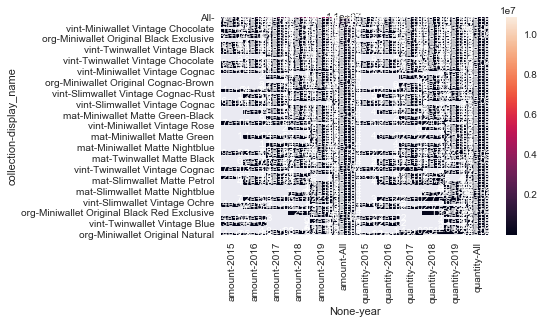

In [48]:
ax = sns.heatmap(germany_displaycomparison_table, annot=True)

<a id='germanyvintage'></a>
### Vintage Collection in Germany

In [ ]:
#filter to a sub-set df of only vintage collection in Germany
germany_vintagedf = germany_collectionsdf[(germany_collectionsdf.collection == 'vint')]


In [ ]:
germany_vintagedf.describe()

In [ ]:
#second approach(Both approaches are correct)

#filter vintage dataframe to only 'Germany'
germany_vintagedf2 =vintagedf[(vintagedf.shipping_country == 'Germany')] 

In [ ]:
germany_vintagedf2.describe()

In [ ]:
#Total quantity of items sold per year for vintage collection and corresponding revenue generated in Germany
germany_vintagedfrank= germany_vintagedf.groupby(
   ['year']
).agg(
    {
         'amount':sum,    # Sum revenue per customer
         'quantity': sum  # get the sum of items sold per year
         
    }
)

germany_vintagedfrank.sort_values(by=['year'], inplace=True, ascending=True)

In [ ]:
germany_vintagedfrank

### Germany vintage Pivot Table

In [ ]:
#  PIVOT TABLE
germanyvintage_table = pd.pivot_table(germany_vintagedf, index="display_name",columns='year',
                              values =["amount","quantity"],aggfunc=sum, margins=True)

#sort the pivot table
germanyvintage_table.sort_values(by=('amount','All'), ascending=False, inplace= True)

In [ ]:
germanyvintage_table

In [ ]:
#fix column names
germanyvintage_table.columns =[s1 + '_' + str(s2) for (s1,s2) in germanyvintage_table.columns.tolist()]

In [ ]:
#proposed column order
columnsTitles = ['quantity_2015','amount_2015','quantity_2016','amount_2016','quantity_2017','amount_2017','quantity_2018','amount_2018','quantity_2019','amount_2019','quantity_All','amount_All']

In [ ]:
#re-arrange column indexes(order) based on above columnsTitles
germanyvintage_table = germanyvintage_table.reindex(columns=columnsTitles)

In [ ]:
#drop first row
germanyvintage_table= germanyvintage_table.drop(germanyvintage_table.index[0])

In [ ]:
germanyvintage_table

<a id='germanyoriginal'></a>
### Original Collection in Germany

In [ ]:
#filter to a sub-set df of only original collection in Germany
germany_originaldf = germany_collectionsdf[(germany_collectionsdf.collection == 'org')]


In [ ]:
germany_originaldf.head()

In [ ]:
#Total quantity of items sold per year for original collection and corresponding revenue generated in Germany
germany_originaldfrank= germany_originaldf.groupby(
   ['year']
).agg(
    {
         'amount':sum,    # Sum revenue per customer
         'quantity': sum  # get the sum of items sold per year
         
    }
)

germany_originaldfrank.sort_values(by=['year'], inplace=True, ascending=True)

In [ ]:
germany_originaldfrank

#### Germany Original Collection Pivot Table

In [ ]:
#  PIVOT TABLE
germanyoriginal_table = pd.pivot_table(germany_originaldf, index="display_name",columns='year',
                              values =["amount","quantity"],aggfunc=sum, margins=True)

#sort the pivot table
germanyoriginal_table .sort_values(by=('amount','All'), ascending=False, inplace= True)

In [ ]:
germanyoriginal_table 

In [ ]:
#fix column names
germanyoriginal_table.columns =[s1 + '_' + str(s2) for (s1,s2) in germanyoriginal_table.columns.tolist()]

In [ ]:
#proposed column order
columnsTitles = ['quantity_2015','amount_2015','quantity_2016','amount_2016','quantity_2017','amount_2017','quantity_2018','amount_2018','quantity_2019','amount_2019','quantity_All','amount_All']

In [ ]:
#re-arrange column indexes(order) based on above columnsTitles
germanyoriginal_table = germanyoriginal_table.reindex(columns=columnsTitles)

In [ ]:
#drop first row
germanyoriginal_table = germanyoriginal_table.drop(germanyoriginal_table.index[0])

In [ ]:
germanyoriginal_table 

<a id='germanymatte'></a>
### Matte Collection in Germany

In [ ]:
#filter to a sub-set df of only Matte collection in Germany
germany_mattedf = germany_collectionsdf[(germany_collectionsdf.collection == 'mat')]


In [ ]:
germany_mattedf.head()

In [ ]:
#Total quantity of items sold per year for original collection and corresponding revenue generated in Germany
germany_mattedfrank= germany_mattedf.groupby(
   ['year']
).agg(
    {
         'amount':sum,    # Sum revenue per customer
         'quantity': sum  # get the sum of items sold per year
         
    }
)

germany_mattedfrank.sort_values(by=['year'], inplace=True, ascending=True)

In [ ]:
germany_mattedfrank

#### Germany Original Collection Pivot Table

In [ ]:
#  PIVOT TABLE
germanymatte_table = pd.pivot_table(germany_mattedf, index="display_name",columns='year',
                              values =["amount","quantity"],aggfunc=sum, margins=True)

#sort the pivot table
germanymatte_table .sort_values(by=('amount','All'), ascending=False, inplace= True)

In [ ]:
germanymatte_table 

In [ ]:
#fix column names
germanymatte_table.columns =[s1 + '_' + str(s2) for (s1,s2) in germanymatte_table.columns.tolist()]

In [ ]:
#proposed column order
columnsTitles = ['quantity_2015','amount_2015','quantity_2016','amount_2016','quantity_2017','amount_2017','quantity_2018','amount_2018','quantity_2019','amount_2019','quantity_All','amount_All']

In [ ]:
#re-arrange column indexes(order) based on above columnsTitles
germanymatte_table = germanymatte_table.reindex(columns=columnsTitles)

In [ ]:
#drop first row
germanymatte_table = germanymatte_table.drop(germanymatte_table.index[0])

In [ ]:
germanymatte_table 

<a id='customer_name'></a>
## VARIABLE : Customer Name

This column is important as it lists all the customers in Germany. As previously indicated in the objective, we shall identify the top three customers that generated the most revenue during the 2015-2019 period.We shall asses sales performance of the three collections in the top three customers in Germany.

In [ ]:
#filter to only ('Germany')
germanydf =df_clean[(df_clean.shipping_country == 'Germany')]                                       

In [ ]:
germanydf.head()

In [ ]:
germanydf.customer_name.describe()#overview of variable; count, unique, top,freq

In [ ]:
# List of customers in Germany
print (germanydf.customer_name.cat.categories)# Get list of categories in categorical variable

In [ ]:
# Total Sales transactions per customer in Germany
germanydf.customer_name.value_counts() #count per category

In [ ]:
#print number of missing values in thi column
print(germanydf.customer_name.isnull().sum()) 

In [ ]:
#Total quantity of items sold and corresponding revenue generated per year in Germany
germany_revenuerank= germanydf.groupby(
   ['year']
).agg(
    {
         'amount':sum,    # Sum revenue per customer
         'quantity': sum  # get the sum of items sold per year
         
    }
)

germany_revenuerank.sort_values(by=['year'], inplace=True, ascending=True) 

In [ ]:
germany_revenuerank

In [ ]:
#Total quantity of items sold and corresponding revenue generated per customer in Germany
germany_customerrevenuerank= germanydf.groupby(
   ['customer_name']
).agg(
    {
         'amount':sum,    # Sum revenue per customer
         'quantity': sum  # get the sum of items sold per year
         
    }
)

germany_customerrevenuerank.sort_values(by=['amount'], inplace=True, ascending=False) 

In [ ]:
germany_customerrevenuerank.head()

<a id='top3'></a>
## **Findings on top 3 revenue generating customers in Germany**

#### Top 3 revenue generating customers are ;
   * C-15374 Miles & More GMBH
   * C-15843 LSG Sky Chefs Frankfurt ZD GmbH
   * C-6879 Leder-Stoll OHG
    
    

<a id='topcustomer'></a>
### Top revenue Customers in Germany performance of vintage ,Original and matte performance


In [ ]:
#create dataframe with transactions of 'C-15374 Miles & More GMBH' during the 2015-2019 in germanydf
topcustomer_2015_2019 = germanydf[(germanydf.customer_name == 'C-15374 Miles & More GMBH')] 

In [ ]:
#Total quantity of items sold per collection and corresponding revenue generated in Germany
topcustomer20152019 = topcustomer_2015_2019.groupby(
   ['year']
).agg(
    {
         'amount':sum,    # Sum revenue per customer
         'quantity': sum  # get the sum of items sold per year
         
    }
)

topcustomer20152019.sort_values(by=['amount'], inplace=True, ascending=False) 

In [ ]:
topcustomer20152019

## Confirm all transactions of customer 'C-15374 Miles & More GMBH' in df_clean 

In [ ]:
#create dataframe with transactions of 'C-15374 Miles & More GMBH' during the 2015-2019 in df_clean
topcustomer2_2015_2019 = df_clean[(df_clean.customer_name == 'C-15374 Miles & More GMBH')] 

In [ ]:
topcustomer2_2015_2019.describe(include='all')

In [ ]:
#Total quantity of items sold per collection and corresponding revenue generated in Germany
topcustomer220152019 = topcustomer2_2015_2019.groupby(
   ['year']
).agg(
    {
         'amount':sum,    # Sum revenue per customer
         'quantity': sum  # get the sum of items sold per year
         
    }
)

topcustomer220152019.sort_values(by=['amount'], inplace=True, ascending=False) 

In [ ]:
topcustomer220152019 

In [ ]:
topcustomer2_2015_2019.shipping_country.describe()#overview of variable; count, unique, top,freq

In [ ]:
# Total Sales transactions per country
topcustomer2_2015_2019.shipping_country.value_counts() #count per category(Transactions per country)

In [ ]:
#print number of missing values in thi column
print(topcustomer2_2015_2019.shipping_country.isnull().sum()) 

In [ ]:
#Total quantity of items sold and corresponding revenue generated per country
topcustomer_countryrevenuerank= topcustomer2_2015_2019.groupby(
   ['customer_name','shipping_country','year']
).agg(
    {
         'amount':sum,    # Sum revenue per customer
         'quantity': sum  # get the sum of items sold per year
         
    }
)

topcustomer_countryrevenuerank.sort_values(by=['amount'], inplace=True, ascending=False) 

In [ ]:
topcustomer_countryrevenuerank.head(10)

## Overall Top Customer Analysis to check if top customer has branches

In [ ]:
topdf = df_clean[df_clean.customer_name.str.contains('C-15374')]

In [ ]:
topdf.describe(include='all')

In [ ]:
topdf.customer_name.describe()

In [ ]:
#Total quantity of items sold and corresponding revenue generated per country
top_rank= topdf.groupby(
   ['customer_name','shipping_country','year']
).agg(
    {
         'amount':sum,    # Sum revenue per customer
         'quantity': sum  # get the sum of items sold per year
         
    }
)

top_rank.sort_values(by=['amount'], inplace=True, ascending=False) 

In [ ]:
top_rank.head(10)

### Findings

We observe that the transactions in germanydf are less than those in df_clean

## Top Customer COLLECTIONS  Germany

In [ ]:
#create dataframe with transactions of 'C-15374 Miles & More GMBH' during the 2015-2019 in collectionsdf
topcustomer_germany = collectionsdf[(collectionsdf.customer_name == 'C-15374 Miles & More GMBH')] 

In [ ]:
topcustomer_germany.head()

In [ ]:
#Total quantity of items sold per collection and corresponding revenue generated in Germany
topcustomergermany_revenuerank = topcustomer_germany.groupby(
   ['collection']
).agg(
    {
         'amount':sum,    # Sum revenue per customer
         'quantity': sum  # get the sum of items sold per year
         
    }
)

topcustomergermany_revenuerank.sort_values(by=['amount'], inplace=True, ascending=False) 

In [ ]:
topcustomergermany_revenuerank

##### The top customer 'C-15374 Miles & More GMBH' bought more original items followed to the vintage and finally matte collections.

In [ ]:
#  PIVOT TABLE
# total quantity and revenue per collection annually for customer
topcustomer_table = pd.pivot_table(topcustomer_germany, index="collection",columns='year',
                              values =["amount","quantity"],aggfunc=sum, margins=True)

#sort the pivot table
topcustomer_table.sort_values(by=('amount','All'), ascending=False, inplace= True)

In [ ]:
topcustomer_table

### 2019 Collection for top customer 'C-15374 Miles & More GMBH'

In [ ]:
#create dataframe with transactions of  'C-15374 Miles & More GMBH' during 2019 year
topcustomer_germany2019 = topcustomer_germany[(topcustomer_germany.year == 2019)] 

In [ ]:
#create new column 'month' that registered name of the month sale transaction was held(helps with analysis)
topcustomer_germany2019['month'] = topcustomer_germany2019.date.dt.month_name()

In [ ]:
topcustomer_germany2019.head()

In [ ]:
# export topcustomer_gremany2019

#export to csv
topcustomer_germany2019.to_csv('topcustomer_germany2019.csv', index = None, header=True)


In [ ]:
#Total quantity of items sold per collection and corresponding revenue generated in Germany in 2019
topcustomergermany_2019rank = topcustomer_germany2019.groupby(
   ['month','collection']
).agg(
    {
         'amount':sum,    # Sum revenue per customer
         'quantity': sum  # get the sum of items sold per year
         
    }
)

topcustomergermany_2019rank.sort_values(by=['month'], inplace=True, ascending=True) 

In [ ]:
topcustomergermany_2019rank

In [ ]:
##-------------------------END OF TOP CUSTOMER ------------------------###

<a id='secondtopcustomer'></a>
### Second Top Customer in Germany transactions from df_clean

In [ ]:
secondtopdf = df_clean[df_clean.customer_name.str.contains('C-15843')]

In [ ]:
secondtopdf.describe(include='all')

In [ ]:
secondtopdf.customer_name.describe()

In [ ]:
#Total quantity of items sold and corresponding revenue generated per country
secondtop_rank= secondtopdf.groupby(
   ['customer_name','shipping_country','year']
).agg(
    {
         'amount':sum,    # Sum revenue per customer
         'quantity': sum  # get the sum of items sold per year
         
    }
)

secondtop_rank.sort_values(by=['amount'], inplace=True, ascending=False) 

In [ ]:
secondtop_rank.head()

## Second top customer in germanydf

In [ ]:
#create dataframe with transactions of 'C-15843 LSG Sky Chefs Frankfurt ZD GmbH' during the 2015-2019 in germany
secondtopcustomer_2015_2019 = germanydf[(germanydf.customer_name == 'C-15843 LSG Sky Chefs Frankfurt ZD GmbH')] 

In [ ]:
#Total quantity of items sold per collection and corresponding revenue generated in Germany
secondtopcustomer20152019 = secondtopcustomer_2015_2019.groupby(
   ['year']
).agg(
    {
         'amount':sum,    # Sum revenue per customer
         'quantity': sum  # get the sum of items sold per year
         
    }
)

secondtopcustomer20152019.sort_values(by=['amount'], inplace=True, ascending=False) 

In [ ]:
secondtopcustomer20152019

## Second top customer COLLECTION in Germany

In [ ]:
#create dataframe with transactions of 'C-15843 LSG Sky Chefs Frankfurt ZD GmbH' during the 2015-2019 period
secondtopcustomer_germany = collectionsdf[(collectionsdf.customer_name == 'C-15843 LSG Sky Chefs Frankfurt ZD GmbH')] 

In [ ]:
secondtopcustomer_germany.head()

In [ ]:
#Total quantity of items sold per collection and corresponding revenue generated in Germany
secondtopcustomergermany_revenuerank = secondtopcustomer_germany.groupby(
   ['collection']
).agg(
    {
         'amount':sum,    # Sum revenue per customer
         'quantity': sum  # get the sum of items sold per year
         
    }
)

secondtopcustomergermany_revenuerank.sort_values(by=['amount'], inplace=True, ascending=False) 

In [ ]:
secondtopcustomergermany_revenuerank

##### The second top revenue generating customer 'C-15843 LSG Sky Chefs Frankfurt ZD GmbH' only bought original items.

In [ ]:
#  PIVOT TABLE
# total quantity and revenue per collection annually for customer
secondtopcustomer_table = pd.pivot_table(secondtopcustomer_germany, index="collection",columns='year',
                              values =["amount","quantity"],aggfunc=sum, margins=True)

#sort the pivot table
secondtopcustomer_table.sort_values(by=('amount','All'), ascending=False, inplace= True)

In [ ]:
secondtopcustomer_table

### 2019 Collection for second top customer 'C-15843 LSG Sky Chefs Frankfurt ZD GmbH'

In [ ]:
#create dataframe with transactions of  'C-15843 LSG Sky Chefs Frankfurt ZD GmbH' during 2019 year
secondtopcustomer_germany2019 = secondtopcustomer_germany[(secondtopcustomer_germany.year == 2019)] 

In [ ]:
#create new column 'month' that registered name of the month sale transaction was held(helps with analysis)
secondtopcustomer_germany2019['month'] = secondtopcustomer_germany2019.date.dt.month_name()

In [ ]:
secondtopcustomer_germany2019.head()

In [ ]:
#Total quantity of items sold per collection and corresponding revenue generated in Germany in 2019
secondtopcustomergermany_2019rank = secondtopcustomer_germany2019.groupby(
   ['month','collection']
).agg(
    {
         'amount':sum,    # Sum revenue per customer
         'quantity': sum  # get the sum of items sold per year
         
    }
)

secondtopcustomergermany_2019rank.sort_values(by=['month'], inplace=True, ascending=True) 

In [ ]:
secondtopcustomergermany_2019rank

<a id='thirdtopcustomer'></a>
## Third Top Customer in Germany

## Overall Top Customer Analysis to check if top customer has branches

In [ ]:
thirdtopdf = df_clean[df_clean.customer_name.str.contains('C-6879')]

In [ ]:
thirdtopdf.describe(include='all')

In [ ]:
thirdtopdf.customer_name.describe()

In [ ]:
#Total quantity of items sold and corresponding revenue generated per country
thirdtop_rank= thirdtopdf.groupby(
   ['customer_name','shipping_country','year']
).agg(
    {
         'amount':sum,    # Sum revenue per customer
         'quantity': sum  # get the sum of items sold per year
         
    }
)

thirdtop_rank.sort_values(by=['amount'], inplace=True, ascending=False) 

In [ ]:
thirdtop_rank.head(10)

### Third top customer in germanydf

In [ ]:
#create dataframe with transactions of 'C-6879 Leder-Stoll OHG' during the 2015-2019 in germany
thirdtopcustomer_2015_2019 = germanydf[(germanydf.customer_name == 'C-6879 Leder-Stoll OHG')] 

In [ ]:
#Total quantity of items sold per collection and corresponding revenue generated in Germany
thirdtopcustomer20152019 = thirdtopcustomer_2015_2019.groupby(
   ['year']
).agg(
    {
         'amount':sum,    # Sum revenue per customer
         'quantity': sum  # get the sum of items sold per year
         
    }
)

thirdtopcustomer20152019.sort_values(by=['amount'], inplace=True, ascending=False) 

In [ ]:
thirdtopcustomer20152019

### Third top customer COLLECTION analysis

In [ ]:
#create dataframe with transactions of 'C-6879 Leder-Stoll OHG' during the 2015-2019
thirdtopcustomer_germany = collectionsdf[(collectionsdf.customer_name == 'C-6879 Leder-Stoll OHG')] 

In [ ]:
thirdtopcustomer_germany.head()

In [ ]:
#Total quantity of items sold per collection and corresponding revenue generated in Germany
thirdtopcustomergermany_revenuerank = thirdtopcustomer_germany.groupby(
   ['collection']
).agg(
    {
         'amount':sum,    # Sum revenue per customer
         'quantity': sum  # get the sum of items sold per year
         
    }
)

thirdtopcustomergermany_revenuerank.sort_values(by=['amount'], inplace=True, ascending=False) 

In [ ]:
thirdtopcustomergermany_revenuerank

##### The third top customer 'C-6879 Leder-Stoll OHG'  bought more vintage items followed by the original and finally matte

In [ ]:
#  PIVOT TABLE
# total quantity and revenue per collection annually for customer
thirdtopcustomer_table = pd.pivot_table(thirdtopcustomer_germany, index="collection",columns='year',
                              values =["amount","quantity"],aggfunc=sum, margins=True)

#sort the pivot table
thirdtopcustomer_table.sort_values(by=('amount','All'), ascending=False, inplace= True)

In [ ]:
thirdtopcustomer_table

### 2019 Collection for third top customer 'C-6879 Leder-Stoll OHG'

In [ ]:
#create dataframe with transactions of 'C-6879 Leder-Stoll OHG' during 2019 year
thirdtopcustomer_germany2019 = thirdtopcustomer_germany[(thirdtopcustomer_germany.year == 2019)] 

In [ ]:
thirdtopcustomer_germany2019.head()

In [ ]:
#create new column 'month' that registered name of the month sale transaction was held(helps with analysis)
thirdtopcustomer_germany2019['month'] = thirdtopcustomer_germany2019.date.dt.month_name()

In [ ]:
thirdtopcustomer_germany2019.head()

In [ ]:
#Total quantity of items sold per collection and corresponding revenue generated in Germany in 2019
thirdtopcustomergermany_2019rank = thirdtopcustomer_germany2019.groupby(
   ['month','collection']
).agg(
    {
         'amount':sum,    # Sum revenue per customer
         'quantity': sum  # get the sum of items sold per year
         
    }
)

thirdtopcustomergermany_2019rank.sort_values(by=['month'], inplace=True, ascending=True) 

In [ ]:
thirdtopcustomergermany_2019rank